# Zadanie nr 1
Treść: Zadanie polega na napisaniu programu, który liczy iloczyn macierzy w następujący sposób - dla macierzy o rozmiarze mniejszym lub równym $2^{l} \times 2^{l}$ stosujemy algorytm tradycjny, a dla macierzy o rozmiarze większym od $2^l\times 2^l$ stosujemy algorytm rekurencyjny Bineta. Następnie przygotujemy raport, który polega na:
1. Opisaniu pseudokodu działania opracowanego algorytmu.
2. Narysowaniu wykresu zależności czasu działania algorytmu od rozmiaru macierzy $2^{k}\times 2^{k}, k = 2,3,4,\ldots, 8$. Analizę przeprowadzimy dla $l \in\{3, 5, 7\}$.
3. Narysowaniu wykresu zależności liczby operacji zmiennoprzecinkowych dla algorytmu od rozmiaru macierzy $2^{k}\times 2^{k}, k = 2,3,4,\ldots, 8$. Analizę przeprowadzimy dla $l \in\{3, 5, 7\}$.

In [2]:
# import bibliotek
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import sys

%matplotlib inline

In [3]:
def is_power_of_two(n):
    """Funtion to determine if number n is a power of 2"""
    return (math.ceil(math.log(n,2)) == math.floor(math.log(n,2)))

## Napiszemy teraz pseudokod dla algorytmu realizującego mnożenie macierzy sposobem tradycyjnym:
1. Wczytujemy dwie macierze kwadratowe A i B wymiarów $2^l\times 2^l$. Odpowiednie założenia zostaną zweryfikowane w funkcji sterującej multiply_matrices, którą opiszemy w dalszym ciągu raportu.
2. Inicjalizujemy macierz zer result będącą wynikiem mnożenia macierzowego, zmienną s, która będzie służyć jako suma tymczasowa do wpisywania elementów macierzy wynikowej, number_mult oraz number_add zliczające odpowiednio liczbę operacji mnożenia i dodawania. Przypisujemy wymiar macierzy A do zmiennej dim.
3. Dla każdego wiersza macierzy A, dla każdej kolumny macierzy B oraz dla każdej kolumny (wiersza) macierzy A (B) korzystamy ze wzoru na sumę składowych elementów macierzy wynikowej, licząc przy tym liczbę operacji zmiennoprzecinkowych.
4. Zwracamy słownik z: macierzą wynikową (będącą wynikiem iloczynu macierzy A i B), liczbą operacji dodawania i liczbą operacji mnożenia.

In [4]:
def multiply_matrices_traditional(A, B):
    """Function to multiplicate matrices A and B using traditional method"""
    dim = A.shape[0]
    result = np.zeros(shape = (dim, dim))
    s = 0
    
    number_mult = 0
    number_add = 0
    
    for row in range(dim):
        for col in range(dim):
            for k in range(dim):
                s += A[row, k] * B[k, col]
                number_mult += 1
                number_add += 1
            number_add -= 1
            result[row, col] = s
            s = 0
    return {'result: ' : result, 'addition_number' : number_add, 'multiplication_number' : number_mult}

## Pseudokod dla algorytmu realizującego mnożenie macierzy sposobem rekurencyjnym Bineta:
1. Wczytujemy dwie macierze kwadratowe A i B wymiarów $2^l\times 2^l$. Odpowiednie założenia zostaną zweryfikowane w funkcji sterującej multiply_matrices, którą opiszemy w dalszym ciągu raportu. Przypisujemy wymiar macierzy (który jest taki sam w A, jak i w B) do zmiennej dim.
2. Jeżeli dim > 2, to realizujemy slicing w macierzach A i B, który będzie stanowić podział w tych macierzach na 4 macierze blokowe w A, jak i w B. Odpowiednie macierze blokowe w macierzy A to $A_{1}, A_{2}, A_{3}, A_{4}$, a w macierzy B to $B_{1}, B_{2}, B_{3}, B_{4}$. Następnie mnożymy bloki macierzy, traktując je jako w pewnym sensie jako "skalary", a następnie przykładamy funkcję multiply_matrices_Binet do każdego z wymnożonego bloku.
3. Jeżeli dim == 2, to wykonujemy standardowe mnożenie macierzy (wymiar = 2, więc macierze blokowe są skalarami, czyli macierzami jednowymiarowymi).
4. Zwracamy wynik mnożenia macierzowego. Z uwagi na obecną rekurencję, liczbę operacji zmiennoprzecinkowych zwrócimy w funkcji sterującej.

In [5]:
def multiply_matrices_Binet(A, B):
    """Function to multiplicate matrices A and B using recursively Binet's method"""
    dim = A.shape[0]
    
    if dim > 2:
        
        A_1 = A[0:int(dim/2), 0:int(dim/2)]
        A_2 = A[0:int(dim/2), int(dim/2):dim]
        A_3 = A[int(dim/2):dim, 0:int(dim/2)]
        A_4 = A[int(dim/2):dim, int(dim/2):dim]


        B_1 = B[0:int(dim/2), 0:int(dim/2)]
        B_2 = B[0:int(dim/2), int(dim/2):dim]
        B_3 = B[int(dim/2):dim, 0:int(dim/2)]
        B_4 = B[int(dim/2):dim, int(dim/2):dim]
                
        C_1 = multiply_matrices_Binet(A_1, B_1) + multiply_matrices_Binet(A_2, B_3)
        C_2 = multiply_matrices_Binet(A_1, B_2) + multiply_matrices_Binet(A_2, B_4)
        C_3 = multiply_matrices_Binet(A_3, B_1) + multiply_matrices_Binet(A_4, B_3)
        C_4 = multiply_matrices_Binet(A_3, B_2) + multiply_matrices_Binet(A_4, B_4)
        
    elif dim == 2:
        result = np.zeros(shape = (dim, dim))
        result[0,0] = A[0,0] * B[0,0] + A[0,1] * B[1,0]
        result[0,1] = A[0, 0] * B[0,1] + A[0,1] * B[1,1]
        result[1,0] = A[1,0] * B[0,0] + A[1,1] * B[1,0]
        result[1,1] = A[1,0] * B[0,1] + A[1,1] * B[1,1]
                
        return result
    
    upper_half = np.concatenate((C_1, C_2), axis=1)
    lower_half = np.concatenate((C_3, C_4), axis=1)
    result = np.concatenate((upper_half, lower_half), axis = 0)
    return result      

## Pseudokod funkcji sterującej
1. Wczytujemy macierze kwadratowe A i B rozmiarów takich, jak w poprzednio opisanych pseudokodach, oraz liczbę l, której znaczenie pozostaje zgodne z treścią zadania (zmienna sterująca przełączaniem pomiędzy funkcją multiply_matrices_traditional a funkcją multiply_matrices_Binet).
2. Sprawdzamy zgodność założeń: czy macierze A i B są kwadratowe rozmiarów $2^k\times 2^k$.
3. Jeżeli wymiar macierzy jest mniejszy niż $2^l$, to wywołujemy funkcję multiply_matrices_traditional. W przeciwnym razie wywołujemy funkcję multiply_matrices_Binet.

In [6]:
# A and B are matrices, l is method threshold

def multiply_matrices(A, B, l):
    """Driver function to multiplication matrices A and B"""
    try:
        A = np.matrix(A)
        B = np.matrix(B)
        l = int(l)
    except ValueError:
        print("Check corectness of parameters!")
        
    dim_row_A = A.shape[0]
    dim_col_A = A.shape[1]
    dim_row_B = B.shape[0]
    dim_col_B = B.shape[1]

    
    if (is_power_of_two(dim_row_A)) & (is_power_of_two(dim_row_B)) & (dim_row_A == dim_col_A) & (dim_row_B == dim_col_B) & (dim_row_A == dim_col_B):
        
        dim = dim_row_A
        
        if dim <= 2**l:
            print('Traditional method')
            return multiply_matrices_traditional(A, B)
        else:
            print('Binet\'s method')
            return {'result: ' : multiply_matrices_Binet(A, B), 'addition_number' : 4**math.log2(dim), 'multiplication_number' : 4**math.log2(dim)*2}
    else:
        print('Check dimensionality of matrices!')
        raise ValueError

### Generowanie macierzy
1. Ustalamy seed równy 123456, żeby upewnić się, że generowane przez nas macierze za każdym wczytaniem komórki będą takie same.
2. Tworzymy listę x_axis, która przechowuje rozmiary sprawdzanych przez nas macierzy.
3. Wewnątrz funkcji generate_matrices deklarujemy pustą listę list_with_matrices, którą następnie powiększamy o każdą wygenerowaną macierz

In [7]:
np.random.seed(123456)

x_axis = [2**int_number for int_number in range(2,9)]

def generate_matrices():
    """This function retruns a tensor with generated 2 * len(x_axis) square matrices of size in list x_axis to multiplicate """
    
    list_with_matrices = []
    for row_index in range(len(x_axis)):
        for _ in range(2):
            M = np.random.randint(-100, 100, size = (x_axis[row_index], x_axis[row_index]))
            list_with_matrices.append(M)
    return list_with_matrices

In [8]:
generated_matrices = generate_matrices()

## Czas mnożenia oraz liczba wykonywanych operacji
1. Sprawdzamy wszystkie warunki, które wymaga od nas treść zadania.
2. Inicjalizujemy dwie puste listy: y_axis_time oraz y_axis_operations, do których dodawać będziemy odpowiednio czas oraz liczbę wykonanych operacji w zależności od rozmiaru przemnażanych macierzy. 
3. Skalar n, którego wartość początkową ustawiamy równą zero, służy nam do tego, aby upewnić się, że wygenerujemy odpowiednią liczbę wartości.
4. W pętli while rozpoczynamy mierzenie czasu, a następnie przemnażamy przez siebie po dwie macierze zaczynając od pierwszej i drugiej.
5. Z każdym wywołaniem pętli n zwiększane jest o 2, żby przy kolejnym jej wywołaniu zacząć od następnej w kolejce macierzy.
6. Funkcja zwraca krotkę składającą się z dwóch wyżej wymienionych list. Każdy element krotki posłuży nam jako wartości na prezentowanych wykresach.

In [9]:

def generate_y_axis(generated_matrices, l):
    """Function returns time of multiplying matrices and number of operations"""
    try:
        l = int(l)
    except ValueError:
        print('l must be integer')
    
    if (l not in [k for k in range(3, 13)]):
        print('l should be an integer greater than 2 and fewer than 12')
        sys.exit(1)
        
    y_axis_time = []
    y_axis_operations = []
    n = 0
    
    while n != 2*len(x_axis):
        start_time = time.time()
        result = multiply_matrices(generated_matrices[n], generated_matrices[n+1], l)
        y_axis_time.append(time.time() - start_time)
        y_axis_operations.append(result['addition_number'] + result['multiplication_number'])
        n += 2
    return (y_axis_time, y_axis_operations)
        
y_axis = generate_y_axis(generated_matrices, 5)
y_axis_l_3 = generate_y_axis(generated_matrices, 3)
y_axis_l_7 = generate_y_axis(generated_matrices, 7)

Traditional method
Traditional method
Traditional method
Traditional method
Binet's method
Binet's method
Binet's method
Traditional method
Traditional method
Binet's method
Binet's method
Binet's method
Binet's method
Binet's method
Traditional method
Traditional method
Traditional method
Traditional method
Traditional method
Traditional method
Binet's method


# Wykresy

#### Wykres przedstawiający zależność rozmiaru macierzy od czasu wykonywania mnożenia dla $ l = 5$

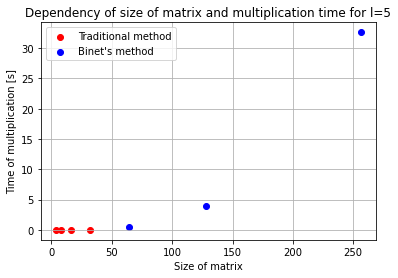

In [10]:
plt.scatter(x_axis[:4], y_axis[0][:4], color = 'r', label = 'Traditional method')
plt.scatter(x_axis[4:], y_axis[0][4:], color = 'b', label = 'Binet\'s method')
plt.legend(loc="upper left")
plt.xlabel('Size of matrix')
plt.ylabel('Time of multiplication [s]')
plt.grid()
plt.title('Dependency of size of matrix and multiplication time for l=5')
plt.show()

#### Wykres przedstawiający zależność rozmiaru macierzy od liczby wykonywanych operacji przy mnożeniu macierzy dla $l = 5$

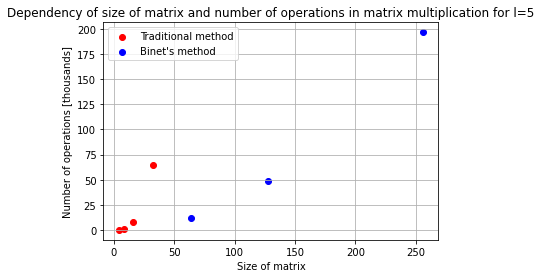

In [13]:
plt.scatter(x_axis[:4], y_axis[1][:4], color = 'r', label = 'Traditional method')
plt.scatter(x_axis[4:], y_axis[1][4:], color = 'b', label = 'Binet\'s method')
plt.legend(loc="upper left")
plt.xlabel('Size of matrix')
plt.ylabel('Number of operations [thousands]')
plt.yticks([0,25000,50000,75000,100000,125000,150000,175000,200000],['0','25','50','75','100','125','150','175','200'])
plt.grid()

plt.title('Dependency of size of matrix and number of operations in matrix multiplication for l=5')
plt.show()

#### Wykres przedstawiający zależność rozmiaru macierzy od czasu wykonywania mnożenia dla $ l = 3$

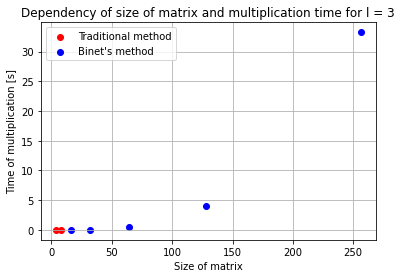

In [14]:
plt.scatter(x_axis[:2], y_axis_l_3[0][:2], color = 'r', label = 'Traditional method')
plt.scatter(x_axis[2:], y_axis_l_3[0][2:], color = 'b', label = 'Binet\'s method')
plt.legend(loc="upper left")
plt.xlabel('Size of matrix')
plt.ylabel('Time of multiplication [s]')
plt.grid()
plt.title('Dependency of size of matrix and multiplication time for l = 3')
plt.show()

#### Wykres przedstawiający zależność rozmiaru macierzy od liczby wykonywanych operacji przy mnożeniu macierzy dla $l = 3$

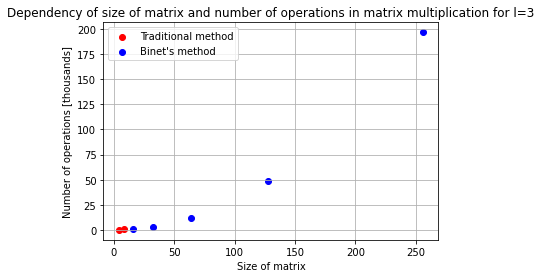

In [20]:
plt.scatter(x_axis[:2], y_axis_l_3[1][:2], color = 'r', label = 'Traditional method')
plt.scatter(x_axis[2:], y_axis_l_3[1][2:], color = 'b', label = 'Binet\'s method')
plt.legend(loc="upper left")
plt.xlabel('Size of matrix')
plt.ylabel('Number of operations [thousands]')
plt.yticks([0,25000,50000,75000,100000,125000,150000,175000,200000],['0','25','50','75','100','125','150','175','200'])
plt.grid()

plt.title('Dependency of size of matrix and number of operations in matrix multiplication for l=3')
plt.show()

#### Wykres przedstawiający zależność rozmiaru macierzy od czasu wykonywania mnożenia dla $l = 7$

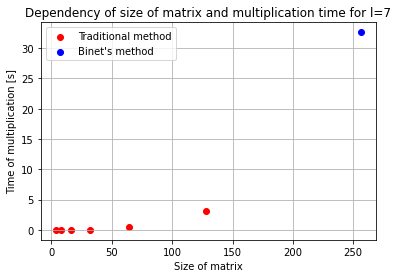

In [17]:
plt.scatter(x_axis[:6], y_axis_l_7[0][:6], color = 'r', label = 'Traditional method')
plt.scatter(x_axis[6:], y_axis_l_7[0][6:], color = 'b', label = 'Binet\'s method')
plt.legend(loc="upper left")
plt.xlabel('Size of matrix')
plt.ylabel('Time of multiplication [s]')
plt.grid()
plt.title('Dependency of size of matrix and multiplication time for l=7')
plt.show()

#### Wykres przedstawiający zależność rozmiaru macierzy od liczby wykonywanych operacji przy mnożeniu macierzy dla $l = 7$

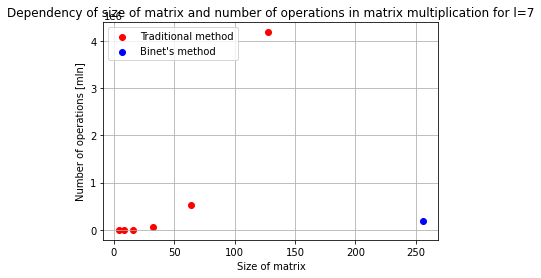

In [18]:
plt.scatter(x_axis[:6], y_axis_l_7[1][:6], color = 'r', label = 'Traditional method')
plt.scatter(x_axis[6:], y_axis_l_7[1][6:], color = 'b', label = 'Binet\'s method')
plt.legend(loc="upper left")
plt.xlabel('Size of matrix')
plt.ylabel('Number of operations [mln]')
plt.grid()

plt.title('Dependency of size of matrix and number of operations in matrix multiplication for l=7')
plt.show()